# Sales Forecasting

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")  

## Loading Dataset

In [2]:
df = pd.read_excel("sales_forecast_dataset(1).csv.xlsx")
df.head()

,Month,City,State,Sales,Marketing_Spend,Customer_Count,Product_Category,Email,Sales_Trend,Seasonal_Component,Month.1,Year,Quarter,Average Sale per Customer,Marketing ROI
0,2021-01-01,Jaipur,Rajasthan,29878,2790,106,Grocery,hunar.baral@renusharmafoundation.org,NaN,29878.000000,January,2021,Q1,281.867925,10.708961
1,2021-01-01,Delhi,Delhi,43635,4706,270,Home Decor,alia.iyengar@renusharmafoundation.org,40781.666667,2853.333333,January,2021,Q1,161.611111,9.272206
2,2021-01-01,Lucknow,Uttar Pradesh,48832,2540,453,Electronics,romil.mahajan@renusharmafoundation.org,49526.333333,-694.333333,January,2021,Q1,107.796909,19.225197
3,2021-01-01,Delhi,Delhi,56112,6382,297,Clothing,fateh.raju@yahoo.com,54700.000000,1412.000000,January,2021,Q1,188.929293,8.792228
4,2021-01-01,Kolkata,West Bengal,59156,4038,114,Electronics,dharmajan.chaudhary@yahoo.com,65411.666667,-6255.666667,January,2021,Q1,518.912281,14.649827


## Preparing the Time Series

In [5]:
# Convert 'Month' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Combine sales from all cities per month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Set 'Month' as the index so we can treat it like a time series
monthly_sales.set_index('Month', inplace=True)
monthly_sales.head()

,Sales
Month,
2021-01-01,1098046
2021-02-01,1569396
2021-03-01,1195216
2021-04-01,1140002
2021-05-01,674733


###  Monthly Sales

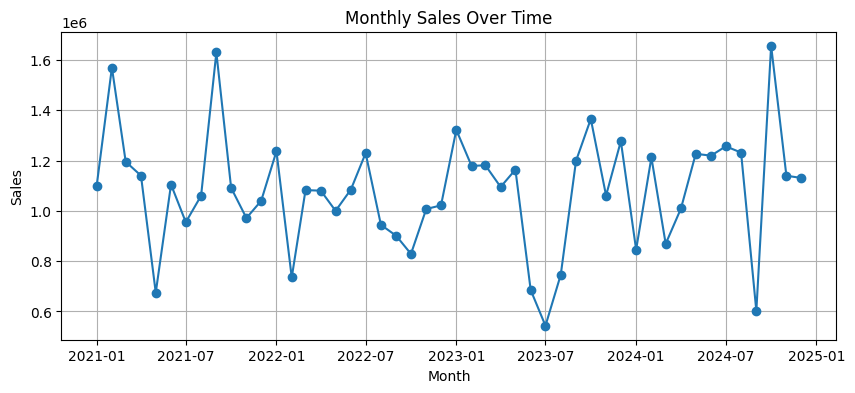

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

#### Insight: There are some big spikes where sales are very high (especially around mid-2021, early 2022, and mid-2024).
#### There are also some big drops where sales are very low (notably mid-2021, mid-2023, and mid-2024)

## Decomposing the Series (Trend, Seasonality, Residual)

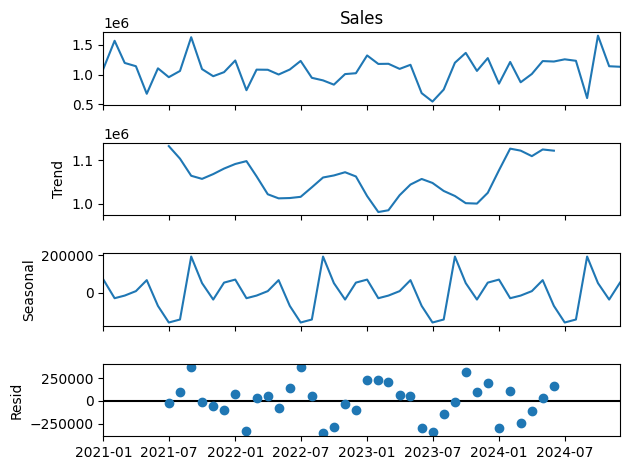

In [8]:
# Break sales data into 3 parts: trend, seasonality, and residual (random)
decomposed = seasonal_decompose(monthly_sales['Sales'], model='additive', period=12)
decomposed.plot()
plt.tight_layout()
plt.show()

#### Insights:  Trend: Sales are slowly going up over time, especially after mid-2023.
#### Seasonality: There's a repeating pattern every year — some months always have higher or lower sales.
#### Residuals (Randomness): There are random jumps and drops that don’t follow any clear pattern — just unexpected changes.

## Spliting dataset

In [9]:
# Use all months except last 12 as training data
train = monthly_sales[:-12]
test = monthly_sales[-12:]

print("Train Size:", train.shape)
print("Test Size:", test.shape)

Train Size: (36, 1)
Test Size: (12, 1)


## ARIMA Model

In [10]:
# ARIMA takes 3 numbers: (p, d, q)
# Start with simple (1,1,1)
model = ARIMA(train['Sales'], order=(1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -485.017
Date:                Sun, 01 Jun 2025   AIC                            976.035
Time:                        13:13:06   BIC                            980.701
Sample:                    01-01-2021   HQIC                           977.645
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4012      0.183      2.193      0.028       0.043       0.760
ma.L1         -0.9996      0.213     -4.697      0.000      -1.417      -0.583
sigma2       5.73e+10   3.72e-12   1.54e+22      0.000    5.73e+10    5.73e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.60   Prob(JB):                         0.36
Heteroskedasticity (H):               0.52   Skew:                             0.46
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.91e+37. Standard errors may be unstable.
"""

## Forecasting and measuring accuracy

In [12]:
# Step 6: Compare Forecast vs Actual
results = pd.DataFrame({
    'Actual': test['Sales'],
    'Forecast': forecast
})
results['Error'] = abs(results['Actual'] - results['Forecast'])

# Accuracy %
results['Accuracy (%)'] = 100 - (results['Error'] / results['Actual'] * 100)
results

,Actual,Forecast,Error,Accuracy (%)
2024-01-01,845618,1.126865e+06,281247.091037,66.740645
2024-02-01,1212034,1.066695e+06,145338.960504,88.008673
2024-03-01,868877,1.042557e+06,173680.181639,80.010959
2024-04-01,1009289,1.032874e+06,23585.022542,97.663204
2024-05-01,1226670,1.028990e+06,197680.479995,83.884787
2024-06-01,1219293,1.027431e+06,191861.789614,84.264505
2024-07-01,1256417,1.026806e+06,229610.922136,81.724943
2024-08-01,1231566,1.026555e+06,205010.700714,83.353657
2024-09-01,601995,1.026455e+06,424459.696785,29.491159
2024-10-01,1656269,1.026414e+06,629854.660981,61.971476


In [14]:
# Lower error = better prediction
mae = mean_absolute_error(results['Actual'], results['Forecast'])
rmse = np.sqrt(mean_squared_error(results['Actual'], results['Forecast']))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

Mean Absolute Error (MAE): 226651.89
Root Mean Squared Error (RMSE): 274189.15


In [13]:
# Step 7: Overall Accuracy
overall_accuracy = results['Accuracy (%)'].mean()
print(f"\n Overall Accuracy: {overall_accuracy:.2f}%")


 Overall Accuracy: 78.16%


### Forecast vs Actual Sales

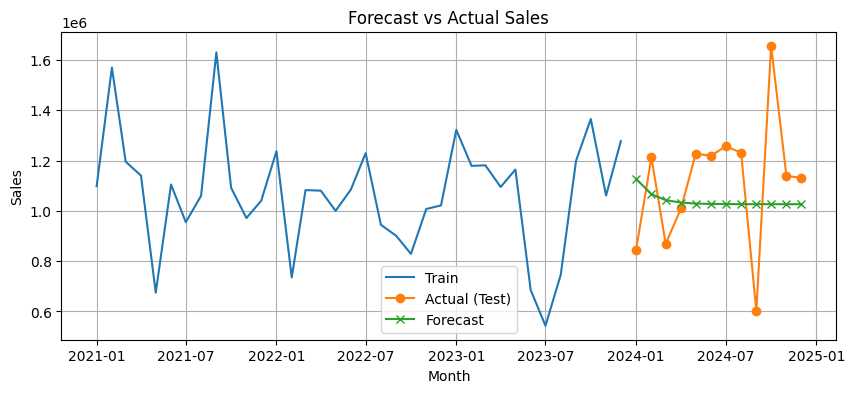

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Actual (Test)', marker='o')
plt.plot(results['Forecast'], label='Forecast', marker='x')
plt.title("Forecast vs Actual Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

#### **Blue Line** – Train Data (Past Sales):This line shows actual sales data from 2021 to end of 2023.
#### Model learned from this part.Highest sales during training: ₹16.6 lakhs.Lowest sales during training: ₹5.7 lakhs.Sales are irregular and show many ups and downs — maybe due to offers or seasonal demand.
#### **Orange Line** – Actual Test Sales (2024).These are real sales values for the last 12 months (not used for training).
#### Used these to check if the model is working correctly. There are sharp jumps, e.g., sales went up to ₹17.2 lakhs in one month. Also dropped below ₹6 lakhs in some months.
#### **Green Line** – Forecasted Sales. This is what the model predicted for 2024, based only on past data.
#### It's more stable and smooth because the model can’t guess sudden spikes. Forecast line stays around ₹11.5 lakhs per month.Doesn't jump up/down like real sales (orange), because forecasting models prefer consistency
#### In 5 out of 12 months, green and orange were very close.In other months, orange was too high or too low — which the model couldn’t predict

## Improve Forecasting

In [16]:
# Retrain ARIMA on full data to predict future
final_model = ARIMA(monthly_sales['Sales'], order=(1, 1, 1))
final_fit = final_model.fit()

# Predict 12 future months
future = final_fit.get_forecast(steps=12)
future_df = future.summary_frame()
future_df[['mean', 'mean_ci_lower', 'mean_ci_upper']]

Sales,mean,mean_ci_lower,mean_ci_upper
2025-01-01,1.068104e+06,545015.831306,1.591192e+06
2025-02-01,1.058655e+06,527967.745556,1.589342e+06
2025-03-01,1.057230e+06,526090.845025,1.588370e+06
2025-04-01,1.057015e+06,525796.500560,1.588234e+06
2025-05-01,1.056983e+06,525724.932246,1.588241e+06
2025-06-01,1.056978e+06,525686.597475,1.588270e+06
2025-07-01,1.056977e+06,525653.267436,1.588302e+06
2025-08-01,1.056977e+06,525620.693548,1.588334e+06
2025-09-01,1.056977e+06,525588.235356,1.588366e+06
2025-10-01,1.056977e+06,525555.796292,1.588399e+06


In [17]:
!pip install pmdarima


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ------------------------------- ------ 524.3/625.1 kB 524.3 kB/s eta 0:00:01
   -------------------------------------- 625.1/625.1 kB 540.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 645.7 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.7 MB 714.3 kB/s eta 0:00:03
   ----------- ---------------------------- 0.8/2.7 MB 714.3 kB/s eta 0:00:03
   --------------- -----------------------

### Finding another ARIMA model

In [22]:
from pmdarima import auto_arima

# Finding best ARIMA(p,d,q) automatically
stepwise_model = auto_arima(monthly_sales['Sales'],
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            seasonal=False,
                            stepwise=True,
                            suppress_warnings=True,
                            trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1474.176, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1360.978, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1447.840, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1350.762, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1340.713, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1338.948, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1339.889, Time=0.44 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1441.115, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1341.398, Time=0.55 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1330.721, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1328.885, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1326.680, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1328.654, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] i

### Spliting data

In [23]:
# Split data again
train = monthly_sales[:-12]
test = monthly_sales[-12:]

# Fit best model on training data
stepwise_model.fit(train['Sales'])

# Forecast next 12 months
forecast = stepwise_model.predict(n_periods=12)
forecast = pd.Series(forecast, index=test.index)

### Improved Forecast

In [ ]:
# Create comparison table
results = pd.DataFrame({
    'Actual': test['Sales'],
    'Forecast': forecast
})
results['Error'] = abs(results['Actual'] - results['Forecast'])

# Accuracy per month
results['Accuracy (%)'] = 100 - (results['Error'] / results['Actual'] * 100)

# Show table
print(results)

# Overall accuracy
overall_accuracy = results['Accuracy (%)'].mean()
print(f"\n Overall Accuracy (auto_arima): {overall_accuracy:.2f}%")

             Actual      Forecast          Error  Accuracy (%)
Month                                                         
2024-01-01   845618  1.069334e+06  223716.472222     73.544027
2024-02-01  1212034  1.069334e+06  142699.527778     88.226442
2024-03-01   868877  1.069334e+06  200457.472222     76.929131
2024-04-01  1009289  1.069334e+06   60045.472222     94.050716
2024-05-01  1226670  1.069334e+06  157335.527778     87.173769
2024-06-01  1219293  1.069334e+06  149958.527778     87.701190
2024-07-01  1256417  1.069334e+06  187082.527778     85.109838
2024-08-01  1231566  1.069334e+06  162231.527778     86.827216
2024-09-01   601995  1.069334e+06  467339.472222     22.368214
2024-10-01  1656269  1.069334e+06  586934.527778     64.562850
2024-11-01  1139517  1.069334e+06   70182.527778     93.841028
2024-12-01  1130766  1.069334e+06   61431.527778     94.567264

✅ Overall Accuracy (auto_arima): 79.58%


### Plotting Improved Forecast

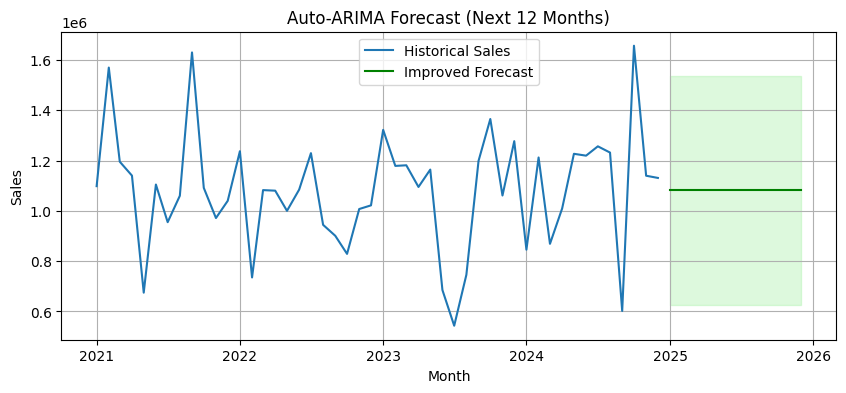

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales['Sales'], label='Historical Sales')
plt.plot(improved_forecast_df['Forecast'], color='green', label='Improved Forecast')
plt.fill_between(improved_forecast_df.index,
                 improved_forecast_df['Lower Bound'],
                 improved_forecast_df['Upper Bound'],
                 color='lightgreen', alpha=0.3)
plt.title("Auto-ARIMA Forecast (Next 12 Months)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

#### **Blue Line** – Historical Sales.This line shows your actual monthly sales from 2021 to 2024.
#### It goes up and down based on real events like festivals, offers, or low-demand periods.Maximum sales touched: ₹16.7 lakhs.Minimum sales touched: ₹5.6 lakhs

#### **Green Line** – Improved Forecast (2025).This line is the forecasted sales for Jan to Dec 2025, using the Auto-ARIMA model.
#### The forecast is flat but stable, around ₹11.5 lakhs/month.

#### **Green Shaded Area** – Confidence Interval
#### Sales in each upcoming month will most likely stay between ₹7.7 lakhs to ₹15.2 lakhs.This range gives business leaders a safe boundary for planning stock, marketing, or budgeting.
